In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import yfinance as yf
import dash
from dash import dcc
from dash import html
import matplotlib.pyplot as plt

## importing data

In [2]:
df_data = pd.read_excel('data_norm.xlsx', header=[0,1], index_col=0)

In [3]:
df_data.index

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM',
       ...
       'WU', 'WY', 'WYNN', 'XEL', 'XOM', 'XRAY', 'YUM', 'ZBH', 'ZBRA', 'ZION'],
      dtype='object', length=389)

In [4]:
data_sample = df_data.sample(n=25, random_state=2)
data_sample

Tickers       ESG       Environmental       Social       Governance   
Ticker  ESG Score Environmental Score Social Score Governance Score   
CL       0.523236            0.618705     0.318182         0.469388  \
AAP      0.179862            0.189928     0.301136         0.275510   
AMGN     0.537866            0.604317     0.380682         0.479592   
CINF     0.179002            0.187050     0.247159         0.316327   
PGR      0.450947            0.388489     0.653409         0.383673   
ALGN     0.197074            0.201439     0.221591         0.357143   
LNT      0.538726            0.572662     0.417614         0.500000   
JPM      0.548193            0.650360     0.323864         0.479592   
DLR      0.518072            0.589928     0.372159         0.459184   
CHRW     0.499139            0.568345     0.323864         0.479592   
LLY      0.518933            0.561151     0.380682         0.495918   
IVZ      0.250430            0.263309     0.133523         0.459184   
CNP      0.440620            0.530935     0.431818         0.316327   
IRM      0.484509            0.561151     0.318182         0.459184   
KEY      0.567126            0.658993     0.326705         0.510204   
URI      0.613597            0.676259     0.517045         0.459184   
UNH      0.484509            0.561151     0.318182         0.459184   
KO       0.484509            0.561151     0.318182         0.459184   
ADBE     0.130809            0.194245     0.045455         0.336735   
AME      0.549053            0.625899     0.403409         0.459184   
MKC      0.484509            0.561151     0.318182         0.459184   
IP       0.526678            0.601439     0.363636         0.469388   
NSC      0.616179            0.735252     0.357955         0.495918   
TER      0.530981            0.597122     0.349432         0.495918   
K        0.521515            0.582734     0.369318         0.479592   

Tickers           Adj Close                                           
Ticker  2009-12-31 00:00:00 2010-12-31 00:00:00 2011-12-31 00:00:00   
CL                29.867113           29.963913           35.380280  \
AAP               36.794765           60.397594           63.816147   
AMGN              41.641537           40.412247           47.756527   
CINF              16.534420           21.077278           21.392101   
PGR               11.337724           13.283214           13.309822   
ALGN              17.820000           19.540001           23.730000   
LNT                9.476256           12.056954           15.103655   
JPM               29.410437           30.089081           24.095938   
DLR               29.238085           31.042160           42.032711   
CHRW              43.379955           60.451122           53.492588   
LLY               23.839399           24.711157           30.933187   
IVZ               14.430345           15.104978           12.894301   
CNP                8.562983            9.783846           13.055321   
IRM                9.185547           10.251984           13.002735   
KEY                3.891144            6.238442            5.496919   
URI                9.735566           22.577381           29.325785   
UNH               25.028746           30.012156           42.673992   
KO                18.923086           22.522270           24.652569   
ADBE              36.779999           30.780001           28.270000   
AME               15.600290           24.157343           26.065651   
MKC               14.014133           18.522509           20.553984   
IP                15.447919           15.976737           17.973444   
NSC               38.405029           47.178074           56.029133   
TER                9.982636           13.062089           12.680649   
K                 34.683395           34.335331           35.086277   

Tickers                                                              ...   
Ticker  2012-12-31 00:00:00 2013-12-31 00:00:00 2014-12-31 00:00:00  ...   
CL          

## Log returns

In [5]:
import log_return
log_re = log_return.log_returns(data_sample['Adj Close'])
log_re

CL     AAP    AMGN    CINF     PGR    ALGN     LNT   
Ticker                                                                        
2010-12-31 00:00:00  0.0032  0.4956 -0.0300  0.2428  0.1584  0.0921  0.2409  \
2011-12-31 00:00:00  0.1662  0.0551  0.1670  0.0148  0.0020  0.1943  0.2253   
2012-12-31 00:00:00  0.1479  0.0416  0.3136  0.2943  0.1436  0.1565  0.0358   
2013-12-31 00:00:00  0.2438  0.4279  0.2986  0.3255  0.2690  0.7223  0.1985   
2014-12-31 00:00:00  0.0807  0.3658  0.3530  0.0259  0.0518 -0.0218  0.2882   
2015-12-31 00:00:00 -0.0157 -0.0551  0.0388  0.1742  0.1908  0.1636 -0.0266   
2016-12-31 00:00:00  0.0044  0.1181 -0.0786  0.2741  0.1389  0.3783  0.2266   
2017-12-31 00:00:00  0.1645 -0.5264  0.2010  0.0231  0.4799  0.8378  0.1488   
2018-12-31 00:00:00 -0.2131  0.4588  0.1418  0.0607  0.0898 -0.0591  0.0234   
2019-12-31 00:00:00  0.1706  0.0185  0.2437  0.3284  0.2242  0.2870  0.2884   
2020-12-31 00:00:00  0.2403 -0.0090 -0.0201 -0.1525  0.3470  0.6498 -0.0322   
2021-12-31 00:00:00  0.0206  0.4362  0.0087  0.2873  0.1029  0.2069  0.2059   
2022-12-31 00:00:00 -0.0559 -0.4541  0.1859 -0.0822  0.2375 -1.1366 -0.0773   

                        JPM     DLR    CHRW  ...     URI     UNH      KO   
Ticker                                       ...                           
2010-12-31 00:00:00  0.0228  0.0599  0.3318  ...  0.8412  0.1816  0.1741  \
2011-12-31 00:00:00 -0.2221  0.3031 -0.1223  ...  0.2615  0.3520  0.0904   
2012-12-31 00:00:00  0.3088  0.0595 -0.0768  ...  0.4321  0.0825  0.0632   
2013-12-31 00:00:00  0.3129 -0.2677 -0.0554  ...  0.5379  0.3439  0.1590   
2014-12-31 00:00:00  0.0942  0.3547  0.2726  ...  0.2690  0.3108  0.0513   
2015-12-31 00:00:00  0.0804  0.1840 -0.1644  ... -0.3409  0.1678  0.0501   
2016-12-31 00:00:00  0.2967  0.2993  0.1905  ...  0.3753  0.3250 -0.0036   
2017-12-31 00:00:00  0.2371  0.1806  0.2196  ...  0.4875  0.3353  0.1344   
2018-12-31 00:00:00 -0.0685 -0.0305 -0.0370  ... -0.5168  0.1356  0.0655   
2019-12-31 00:00:00  0.3870  0.1529 -0.0482  ...  0.4865  0.1823  0.1873   
2020-12-31 00:00:00 -0.0569  0.1854  0.2066  ...  0.3297  0.1927  0.0244   
2021-12-31 00:00:00  0.2449  0.2674  0.1641  ...  0.3597  0.3730  0.1077   
2022-12-31 00:00:00 -0.1351 -0.5276 -0.1404  ...  0.0673  0.0671  0.1008   

                       ADBE     AME     MKC      IP     NSC     TER       K  
Ticker                                                                       
2010-12-31 00:00:00 -0.1781  0.4373  0.2789  0.0337  0.2057  0.2689 -0.0101  
2011-12-31 00:00:00 -0.0851  0.0760  0.1041  0.1178  0.1719 -0.0296  0.0216  
2012-12-31 00:00:00  0.2873  0.2979  0.2521  0.3309 -0.1364  0.2144  0.1325  
2013-12-31 00:00:00  0.4632  0.3432  0.1017  0.2352  0.4328  0.0423  0.1186  
2014-12-31 00:00:00  0.1940  0.0055  0.0963  0.1322  0.1886  0.1255  0.0986  
2015-12-31 00:00:00  0.2563  0.0247  0.1612 -0.3178 -0.2276  0.0557  0.1294  
2016-12-31 00:00:00  0.0916 -0.0902  0.1049  0.3848  0.2737  0.2176  0.0464  
2017-12-31 00:00:00  0.5319  0.4053  0.1074  0.1234  0.3137  0.5078 -0.0505  
2018-12-31 00:00:00  0.2554 -0.0607  0.3294 -0.3246  0.0509 -0.2794 -0.1429  
2019-12-31 00:00:00  0.3769  0.3939  0.2123  0.1779  0.2806  0.7836  0.2317  
2020-12-31 00:00:00  0.4163  0.2004  0.1335  0.1296  0.2213  0.5694 -0.0702  
2021-12-31 00:00:00  0.1256  0.2015  0.0263  0.0343  0.2411  0.3134  0.0717  
2022-12-31 00:00:00 -0.5218 -0.0443 -0.1353 -0.2619 -0.1695 -0.6227  0.1341  

[13 rows x 25 columns]

In [6]:
log_re.columns

Index(['CL', 'AAP', 'AMGN', 'CINF', 'PGR', 'ALGN', 'LNT', 'JPM', 'DLR', 'CHRW',
       'LLY', 'IVZ', 'CNP', 'IRM', 'KEY', 'URI', 'UNH', 'KO', 'ADBE', 'AME',
       'MKC', 'IP', 'NSC', 'TER', 'K'],
      dtype='object')

In [7]:
from fetch_score import get_scores
esg_np, e_np, s_np, g_np = get_scores(data_sample)

In [8]:
log_re.index

Index([2010-12-31 00:00:00, 2011-12-31 00:00:00, 2012-12-31 00:00:00,
       2013-12-31 00:00:00, 2014-12-31 00:00:00, 2015-12-31 00:00:00,
       2016-12-31 00:00:00, 2017-12-31 00:00:00, 2018-12-31 00:00:00,
       2019-12-31 00:00:00, 2020-12-31 00:00:00, 2021-12-31 00:00:00,
       2022-12-31 00:00:00],
      dtype='object', name='Ticker')

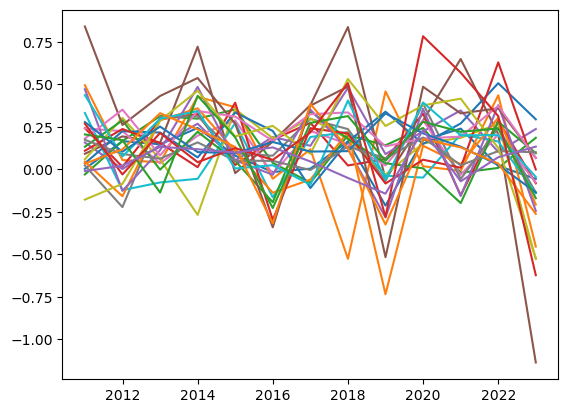

In [9]:
plt.plot(log_re.index, log_re.values)

## Covariance and inverse covariance matrix, and stocks mean return

In [10]:
from covariance import cov_matrix
from mean_ret import mean_return

cov_var = cov_matrix(log_re)
inv_cov = np.linalg.inv(cov_var)
mean_re = mean_return(log_re)

## Finding two optimal portfolios with different expected return

In [11]:
from ones import vector_ones
from mvp import mvp_func
from weights_mvp import mvp_weights

vector_one = vector_ones(data_sample)
a, b, c, d = mvp_func(inv_cov, mean_re, vector_one)
w1, w2 = mvp_weights(a, b, c, d, inv_cov, vector_one, mean_re, 0.10, 0.26)

## ESG insensitive investor

In [12]:
from alpha import alpha
from two_fun_theorem import w3

alpha_list = alpha([-3.5])
ef_weights, r, vol, esg_wa = w3(w1, w2, alpha_list, mean_re, cov_var, esg_np)

In [13]:
tickers_list = []
labels = data_sample.index
for i in range(len(ef_weights)):
    #assets = np.random.choice(list(labels), len(labels), replace=False)
    assets = list(labels)
    tickers_list.append(assets)
sr_t_list = list(labels)

MVP

In [14]:
from global_mvp import global_mvp
mvp_weight, mvp_er, mvp_vol, mvp_esg_score, mvp_e_score, mvp_s_score, mvp_g_score = global_mvp(ef_weights, vol, mean_re, cov_var, esg_np, e_np, s_np, g_np)

## ESG indicators

In [15]:
from esg_indicators import indicators
indicators(vector_one, inv_cov, mean_re, r, esg_np)

Variable outputs used from the paper
------------------------------------
Is delta 1 larger than zero: True
-------------------------------------
The value of delta 1 is: 0.23337328803346696
-------------------------------------
--------------------------------------
ESG score of the MVP is: 0.4849035572299765
--------------------------------------


## ESG sensitive investor 

In [16]:
from esg_investor_weights import calculate_esg_sensitive_investor
list_target_returns = np.arange(r.min(), r.max(), 0.0016).tolist()
len(list_target_returns)
esg_investor_weights, esg_portfolio_returns, esg_portfolio_vol, esg_investor_wa  = calculate_esg_sensitive_investor(mean_re, cov_var, esg_np, 0.46, list_target_returns, mvp_weight)

## Computing Sharpe Ratio

### Insenstive investor

In [18]:
log_re.columns

Index(['CL', 'AAP', 'AMGN', 'CINF', 'PGR', 'ALGN', 'LNT', 'JPM', 'DLR', 'CHRW',
       'LLY', 'IVZ', 'CNP', 'IRM', 'KEY', 'URI', 'UNH', 'KO', 'ADBE', 'AME',
       'MKC', 'IP', 'NSC', 'TER', 'K'],
      dtype='object')

In [19]:
from calculating_max_sr import calculate_max_sharpe_ratio
sr, w_opt, sharpe_exp, sharpe_vol, sr_esg_score, sr_e_score, sr_s_score, sr_g_score = calculate_max_sharpe_ratio(0.03, mean_re, cov_var, esg_np, e_np, s_np, g_np, mvp_weight, log_re.columns.tolist())

### Sensitive investor

In [20]:
from calculating_max_ESG_sr import calculate_max_ESG_sharpe_ratio
sr_esg, w_opt_esg, sharpe_exp_esg, sharpe_vol_esg, sr_esg_esg_score, sr_esg_e_score, sr_esg_s_score, sr_esg_g_score = calculate_max_ESG_sharpe_ratio(0.03, mean_re, cov_var, esg_np, e_np, s_np, g_np, mvp_weight, log_re.columns.tolist(), 0.46)

## Computing Sortino Ratio

### Insensitive investor

In [21]:
from calculating_max_sortino import calculate_sortino_ratio
optimal_weights, optimal_sortino_ratio, sortino_exp, sortino_vol, sortino_score, sortino_e_score, sortino_s_score, sortino_g_score = calculate_sortino_ratio(log_re, 0.03, log_re.columns.tolist(), mvp_weight, mean_re, cov_var, esg_np, e_np, s_np, g_np)

### Sensitive investor

In [24]:
from calculate_max_ESG_sortino import calculate_ESG_sortino_ratio
optimal_weights_esg, optimal_sortino_ratio_esg, sortino_exp_esg, sortino_vol_esg, sortino_score_esg, sortino_e_score_esg, sortino_s_score_esg, sortino_g_score_esg = calculate_ESG_sortino_ratio(log_re, 0.03, log_re.columns.tolist(), mvp_weight, mean_re, cov_var, esg_np, e_np, s_np, g_np, 0.46)

## Plotting the frontiers

In [25]:
from plot_ef import ef_plot
plot = ef_plot(tickers_list, sr_t_list, 
               ef_weights, vol, r, esg_wa, 
               esg_investor_weights, esg_portfolio_vol, esg_portfolio_returns, esg_investor_wa, 
               w_opt, sharpe_vol, sharpe_exp, sr, sr_esg_score,
               w_opt_esg, sharpe_vol_esg, sharpe_exp_esg, sr_esg, sr_esg_esg_score,
               mvp_weight, mvp_vol, mvp_er, mvp_esg_score, 
               optimal_weights, sortino_vol, sortino_exp, optimal_sortino_ratio, sortino_score, 
               optimal_weights_esg, sortino_vol_esg, sortino_exp_esg, optimal_sortino_ratio_esg, sortino_score_esg,
               ratio='Sharpe Ratio')

plot.show()